In [1]:
!pip install stim~=1.14
!pip install numpy~=1.0  # 1.0 instead of 2.0 for pymatching compatibility later
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.5 MB/s eta 0:00:00a 0:00:010m


In [2]:
import stim
print(stim.__version__)

1.14.0


In [9]:
circuit = stim.Circuit()

# First, the circuit will initialize a Bell pair.
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])

# Then, the circuit will measure both qubits of the Bell pair in the Z basis.
circuit.append("M", [0, 1])

In [10]:
circuit.diagram()

q0: -H-@-@-M:rec[0]-
       | |
q1: ---X-|-M:rec[1]-
         |
q2: -----X----------

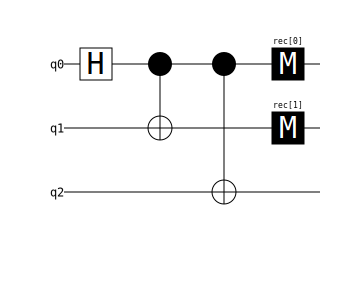

In [11]:
circuit.diagram('timeline-svg')

In [6]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

[[ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False False]]


In [7]:
# Indicate the two previous measurements are supposed to consistently agree.
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2)])
print(repr(circuit))

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
    DETECTOR rec[-1] rec[-2]
''')


In [8]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=5))

[[False]
 [False]
 [False]
 [False]
 [False]]


In [12]:
circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=H_0;CX_0_1_0_2;M_0_1'

## Trying to create circuit from tableau based on stabilizer generators

In [14]:
# 5-qubit code from generators:
stim.Tableau.from_stabilizers([
    stim.PauliString("XZZXI"),
    stim.PauliString("IXZZX"),
    stim.PauliString("XIXZZ"),
    stim.PauliString("ZXIXZ")
], allow_redundant=True, allow_underconstrained=True)

stim.Tableau.from_conjugated_generators(
    xs=[
        stim.PauliString("-__X_Z"),
        stim.PauliString("+____Z"),
        stim.PauliString("-Z_X_Z"),
        stim.PauliString("+_Z__Z"),
        stim.PauliString("-Z_XX_"),
    ],
    zs=[
        stim.PauliString("+XZZX_"),
        stim.PauliString("+_XZZX"),
        stim.PauliString("+X_XZZ"),
        stim.PauliString("+ZX_XZ"),
        stim.PauliString("-_ZXZ_"),
    ],
)

In [0]:
# EPR pair:
circuit1 = stim.Circuit()
circuit1.append("H", 0)
# circuit1.append("H", 0)
circuit1.append("CNOT", [0,1])
# circuit1.append("CNOT", [0,1])
stim.Tableau.from_circuit(circuit1)

In [39]:
#create tesseract subsystem color code (http://arxiv.org/abs/2409.04628) from stabilizer generators:
tesseract_code = stim.Tableau.from_stabilizers([
    stim.PauliString("XXXXXXXXIIIIIIII"), #rows 1-2
    stim.PauliString("IIIIXXXXXXXXIIII"), #rows 2-3
    stim.PauliString("IIIIIIIIXXXXXXXX"), #rows 3-4
    stim.PauliString("ZZZZZZZZIIIIIIII"), #rows 1-2
    stim.PauliString("IIIIZZZZZZZZIIII"), #rows 2-3
    stim.PauliString("IIIIIIIIZZZZZZZZ"), #rows 3-4
    stim.PauliString("XXIIXXIIXXIIXXII"), #columns 1-2
    stim.PauliString("ZZIIZZIIZZIIZZII"), #columns 1-2
    stim.PauliString("IXXIIXXIIXXIIXXI"), #columns 2-3
    stim.PauliString("IZZIIZZIIZZIIZZI"), #columns 2-3
], allow_redundant=False, allow_underconstrained=True)

In [40]:
tesseract_circuit = tesseract_code.to_circuit()

In [41]:
tesseract_circuit.to_crumble_url()

'https://algassert.com/crumble#circuit=CX_6_0_0_6_6_0;H_0_1_8;CX_0_1_0_3_0_7_0_8_0_11_0_12_0_14;H_6;CX_6_0_6_1_1_6_6_1;H_2;CX_1_2_1_6_1_9_1_12_1_13_1_14_1_15_8_1_9_2_2_9_9_2_2_3_7_2_8_2_10_2_12_2_14_2_4_3_5_3_7_3_10_3_13_3_15_3_6_4_4_6_6_4_4_6_4_8_4_9_4_10_4_12_4_15_7_5_5_7_7_5_5_6_7_5_8_5_10_5_11_5_14_5_15_5_8_6_6_8_8_6_6_10_6_13_6_14_8_7_7_8_8_7_10_7_11_7_12_7_13_7_9_8_8_9_9_8_8_9_8_10_8_11_8_12_8_13_8_14_8_15_10_9_11_9_12_9_13_9_14_9_15_9'